# Diffusion Coefficients of Fluorophores for FCS Calibration

## Introduction
This notebook calculates and visualizes the variation in diffusion coefficients of fluorophores as a function of temperature. Understanding these changes is essential for accurate calibration of the confocal volume in Fluorescence Correlation Spectroscopy (FCS) measurements. The diffusion coefficient of a molecule in a solvent is influenced by both temperature and solvent viscosity, the latter of which also varies with temperature.

## Import Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

These functions are used to calculate the viscosity of water and the diffusion coefficients of molecules at different temperatures. Additionally, they provide utilities for converting between temperature units.


In [4]:
def water_viscosity(T):
    A = 2.414e-5  # Pa·s
    B = 247.8     # K
    C = 140       # K
    return A * 10 ** (B / (T - C))

def diffusion_coefficient_temperature(D1, T2, T1=298.15):
    D2 = D1 * (T2 / T1) * (water_viscosity(T1) / water_viscosity(T2))
    return D2

def k_to_c(K):
    return K - 273.15

def c_to_k(c):
    return c + 273.15

## Visualize Water Viscosity vs Temperature

The relationship between the viscosity of water (η; Pa⋅s) and temperature (T; K) can be described using:

$$
η = A \cdot \exp\left(\frac{B}{T - C}\right)
$$
where

-  A = 2.414⋅10<sup>-5</sup>
-  B = 247.8 K
-  C = 140 K

This equation allows us to model how the viscosity of water changes with temperature, which is a critical factor affecting diffusion rates.

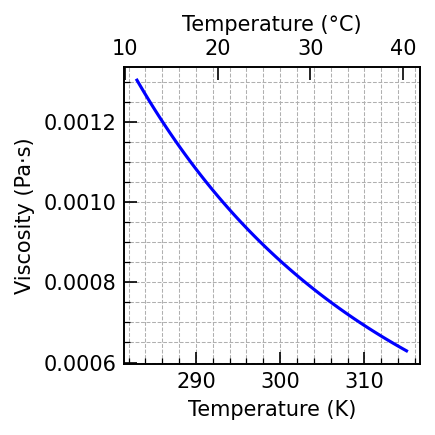

In [6]:
# Generate temperature range
T_values = np.linspace(283, 315, 100)  # Temperature range in Kelvin (10°C to 42°C)
viscosities = water_viscosity(T_values)

# Plot the results
plt.figure(figsize=(3, 3), dpi=150)
plt.plot(T_values, viscosities, label='Viscosity of Water', color='b')
plt.xlabel('Temperature (K)')
plt.ylabel('Viscosity (Pa·s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Add top x-axis for temperature in Celsius
ax = plt.gca()
ax_top = ax.twiny()
ax_top.set_xlim(k_to_c(T_values[0]), k_to_c(T_values[-1]))
ax_top.set_xlabel('Temperature (°C)')

# Add major and minor ticks
ax.tick_params(axis='both', which='major', direction='in', length=6)
ax.tick_params(axis='both', which='minor', direction='in', length=3)
ax_top.tick_params(axis='x', which='major', direction='in', length=6)
ax_top.tick_params(axis='x', which='minor', direction='in', length=3)

plt.tight_layout()
plt.show()


## Fluorophore Data

This section defines commonly used fluorophores along with their diffusion coefficients at 25°C (298.15 K) and the corresponding standard errors. You can uncomment and add additional fluorophores as needed for your specific calibration. The diffusion coefficient is stored in units of µm²/s.

<i>Feel free to contribute to this list by submitting a pull request via GitHub!</i>

In [8]:
fluorophores = [
    # {'name': 'ATTO655-maleimide', 'diffusion_coefficient_25c': 470, 's_err': 10},
    # {'name': 'ATTO655-carboxylic acid', 'diffusion_coefficient_25c': 426, 's_err': 8},
    # {'name': 'ATTO655-NHS ester', 'diffusion_coefficient_25c': 425, 's_err': 6},
    {'name': 'Cy5', 'diffusion_coefficient_25c': 360, 's_err': 10},
    {'name': 'Alexa647', 'diffusion_coefficient_25c': 330, 's_err': 10},
    # {'name': 'Alexa633', 'diffusion_coefficient_25c': 340, 's_err': 10},
    # {'name': 'Rhodamine 6G', 'diffusion_coefficient_25c': 414, 's_err': 5},
    # {'name': 'Rhodamine B', 'diffusion_coefficient_25c': 450, 's_err': 40},
    # {'name': 'Rhodamine 123', 'diffusion_coefficient_25c': 460, 's_err': 40},
    #{'name': 'Rhodamine 110', 'diffusion_coefficient_25c': 470, 's_err': 40},
    {'name': 'Fluorescein', 'diffusion_coefficient_25c': 425, 's_err': 1},
    # {'name': 'Oregon Green 488', 'diffusion_coefficient_25c': 410, 's_err': 8},
    # {'name': 'ATTO488-carboxylic acid', 'diffusion_coefficient_25c': 400, 's_err': 10},
    # {'name': 'TetraSpeck Beads 0.1 µM', 'diffusion_coefficient_25c': 4.4, 's_err': 7},
]

## Plot Diffusion Coefficient vs Temperature

Now that we know the viscosity of water at the desired temperature (η(T)), we can use this to calculate the temperature-adjusted diffusion coefficient (D(T)). This is done using the known diffusion coefficient at 25 C (D(298.15 K)) and viscosity at 25 C (η(298.15 K) = 8.9·10<sup>-4</sup>). The formula to calculate D(T) is:
$$
D(T) = D(298.15) \cdot \frac{T}{298.15} \cdot \frac{8.9 \cdot 10^{-4}}{η(T)}
$$
This function visualizes how the diffusion coefficients of selected fluorophores change with temperature.

In [10]:
def plot_diffusion_vs_temperature(fluorophores, T_values, s_err=True):
    
    plt.figure(figsize=(6, 3), dpi=150)
    
    for fluorophore in fluorophores:
        D1 = fluorophore['diffusion_coefficient_25c']
        # Only use standard error if s_err is True
        if s_err:
            s_err_value = fluorophore['s_err']
            # Calculate diffusion coefficients and standard deviations
            diffusion_values = [diffusion_coefficient_temperature(D1, T) for T in T_values]
            upper_bound = [D + s_err_value for D in diffusion_values]
            lower_bound = [D - s_err_value for D in diffusion_values]

            # Plot the diffusion coefficient line
            plt.plot(T_values, diffusion_values, label=fluorophore['name'])

            # Plot the shaded area for the standard error
            plt.fill_between(T_values, lower_bound, upper_bound, alpha=0.2)
        else:
            # If s_err is False, just plot the diffusion coefficient line without the shaded area
            diffusion_values = [diffusion_coefficient_temperature(D1, T) for T in T_values]
            plt.plot(T_values, diffusion_values, label=fluorophore['name'])

    plt.xlabel('Temperature (K)')
    plt.ylabel('Diffusion Coefficient (µm²/s)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()

    # Move legend outside to the right
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Add top x-axis for temperature in Celsius
    ax = plt.gca()
    ax_top = ax.twiny()
    ax_top.set_xlim(k_to_c(T_values[0]), k_to_c(T_values[-1]))
    ax_top.set_xlabel('Temperature (°C)')

    # Add major and minor ticks
    ax.tick_params(axis='both', which='major', direction='in', length=6)
    ax.tick_params(axis='both', which='minor', direction='in', length=3)
    ax_top.tick_params(axis='x', which='major', direction='in', length=6)
    ax_top.tick_params(axis='x', which='minor', direction='in', length=3)

    plt.tight_layout()  # Adjust layout to prevent clipping of the legend
    plt.show()

## Generate and Display the Plot

In this step, we will generate a plot to visualize how the diffusion coefficients of the selected fluorophores change as a function of temperature.


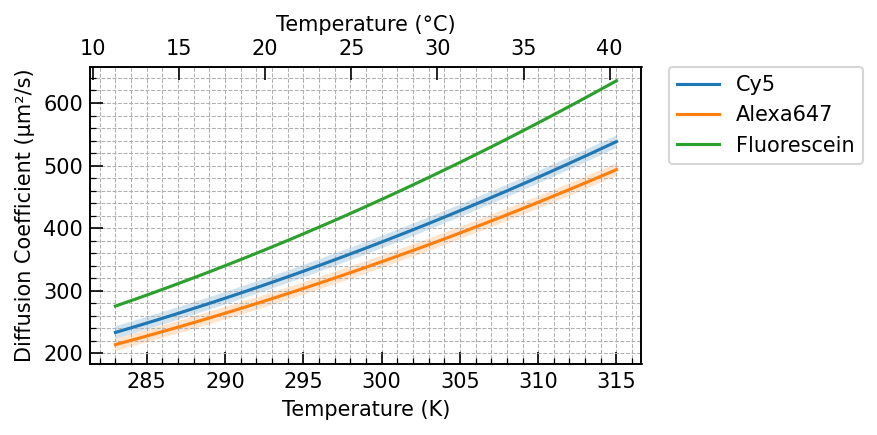

In [12]:
# Generate temperature range (10°C to 42°C)
T_values = np.linspace(283, 315, 100)  # Temperature range in Kelvin

# Call the function to plot diffusion vs temperature
plot_diffusion_vs_temperature(fluorophores, T_values)

## Calculate Values for Specific Temperatures

If you would like to calculate the diffusion coefficient at a specific temperature (for example, the temperature at which you will be conducting your measurements), you can do so using the following method:

In [14]:
def print_diffusion_coefficients(fluorophores, temperature, T1=298.15):
    print(f"Diffusion coefficients at {temperature} K:")
    
    for fluorophore in fluorophores:
        D1 = fluorophore.get('diffusion_coefficient_25c')
        if D1 is not None:
            diffusion_coeff = diffusion_coefficient_temperature(D1, temperature, T1)
            print(f"{fluorophore['name']}: {diffusion_coeff:.2f} µm²/s")
        else:
            print(f"{fluorophore['name']}: Diffusion coefficient not available")

In [15]:
# Call the function to print diffusion coefficient from at a specfic temperature (294.15 K, 21 °C)
print_diffusion_coefficients(fluorophores, 294.15)

Diffusion coefficients at 294.15 K:
Cy5: 323.43 µm²/s
Alexa647: 296.48 µm²/s
Fluorescein: 381.83 µm²/s
